In [1]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## EDA

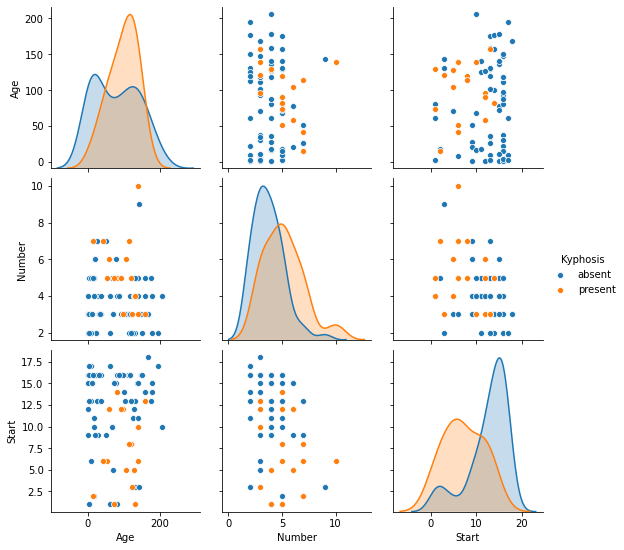

In [7]:
sns.pairplot(df, hue = 'Kyphosis')

## Decision Tree

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier()

In [13]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = dtree.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [19]:
print(confusion_matrix(y_test, y_pred))

[[16  3]
 [ 4  2]]


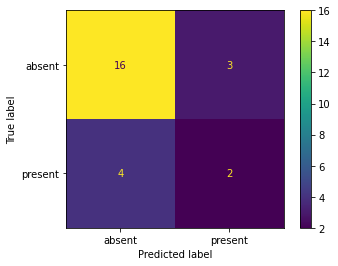

In [20]:
plot_confusion_matrix(dtree, X_test, y_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



## Tree Visualization

In [21]:
from sklearn import tree

In [22]:
features = list(df.columns[1:])
targets = ['absent', 'present']
print(features)
print(targets)

['Age', 'Number', 'Start']
['absent', 'present']


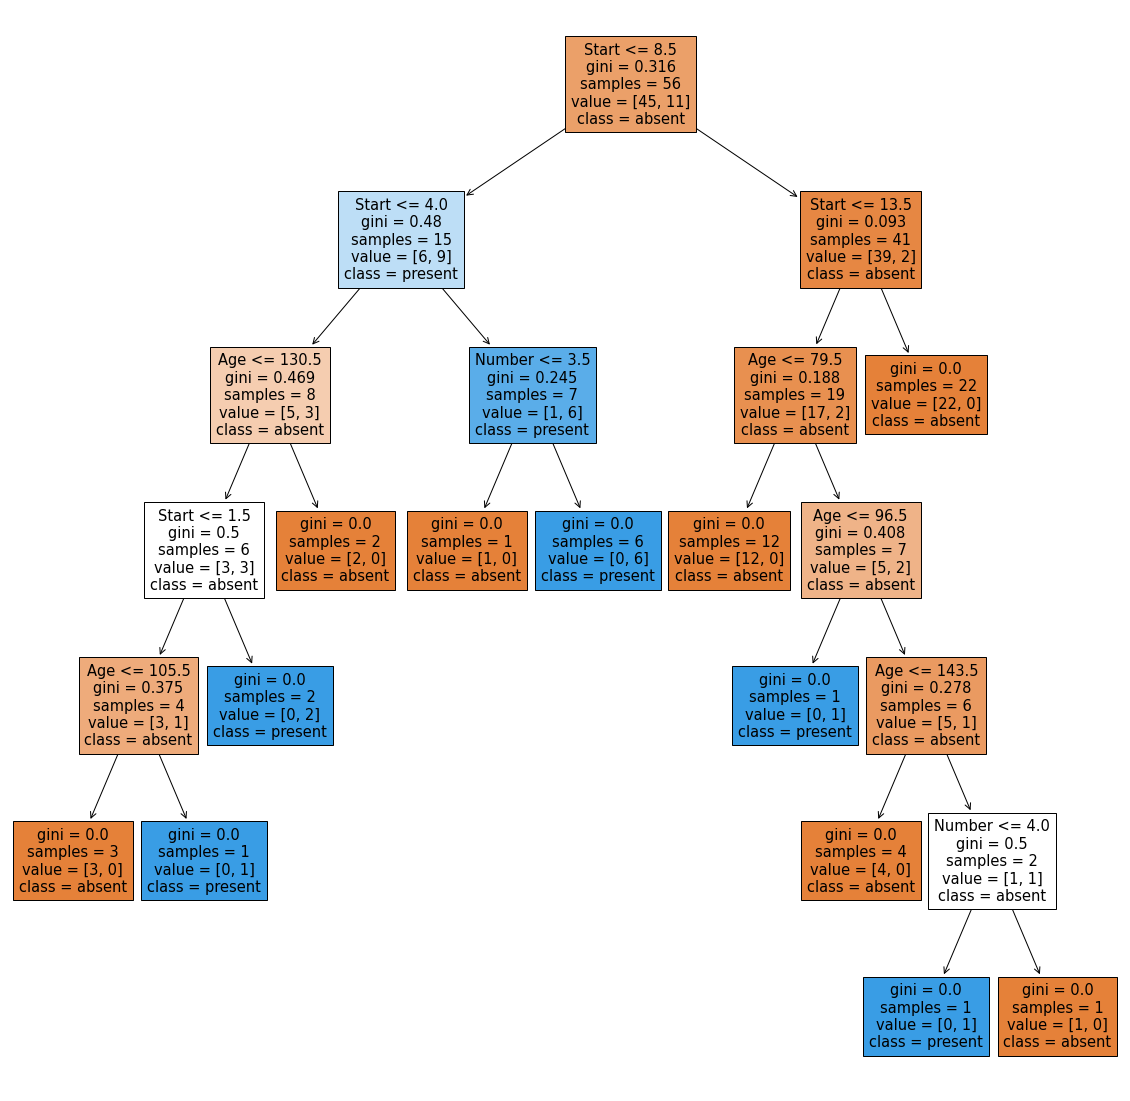

In [24]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(dtree,filled=True,feature_names=features ,class_names = targets)

## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier(n_estimators = 100)

In [27]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
y_pred_rf = model.predict(X_test)

In [29]:
print(confusion_matrix(y_test, y_pred_rf))

[[19  0]
 [ 5  1]]


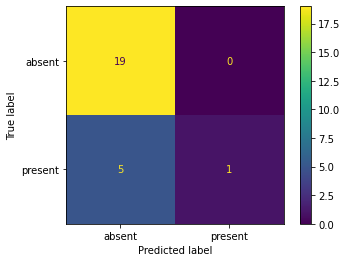

In [30]:
plot_confusion_matrix(model, X_test, y_test)

In [31]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

      absent       1.00      0.79      0.88        24
     present       0.17      1.00      0.29         1

    accuracy                           0.80        25
   macro avg       0.58      0.90      0.58        25
weighted avg       0.97      0.80      0.86        25



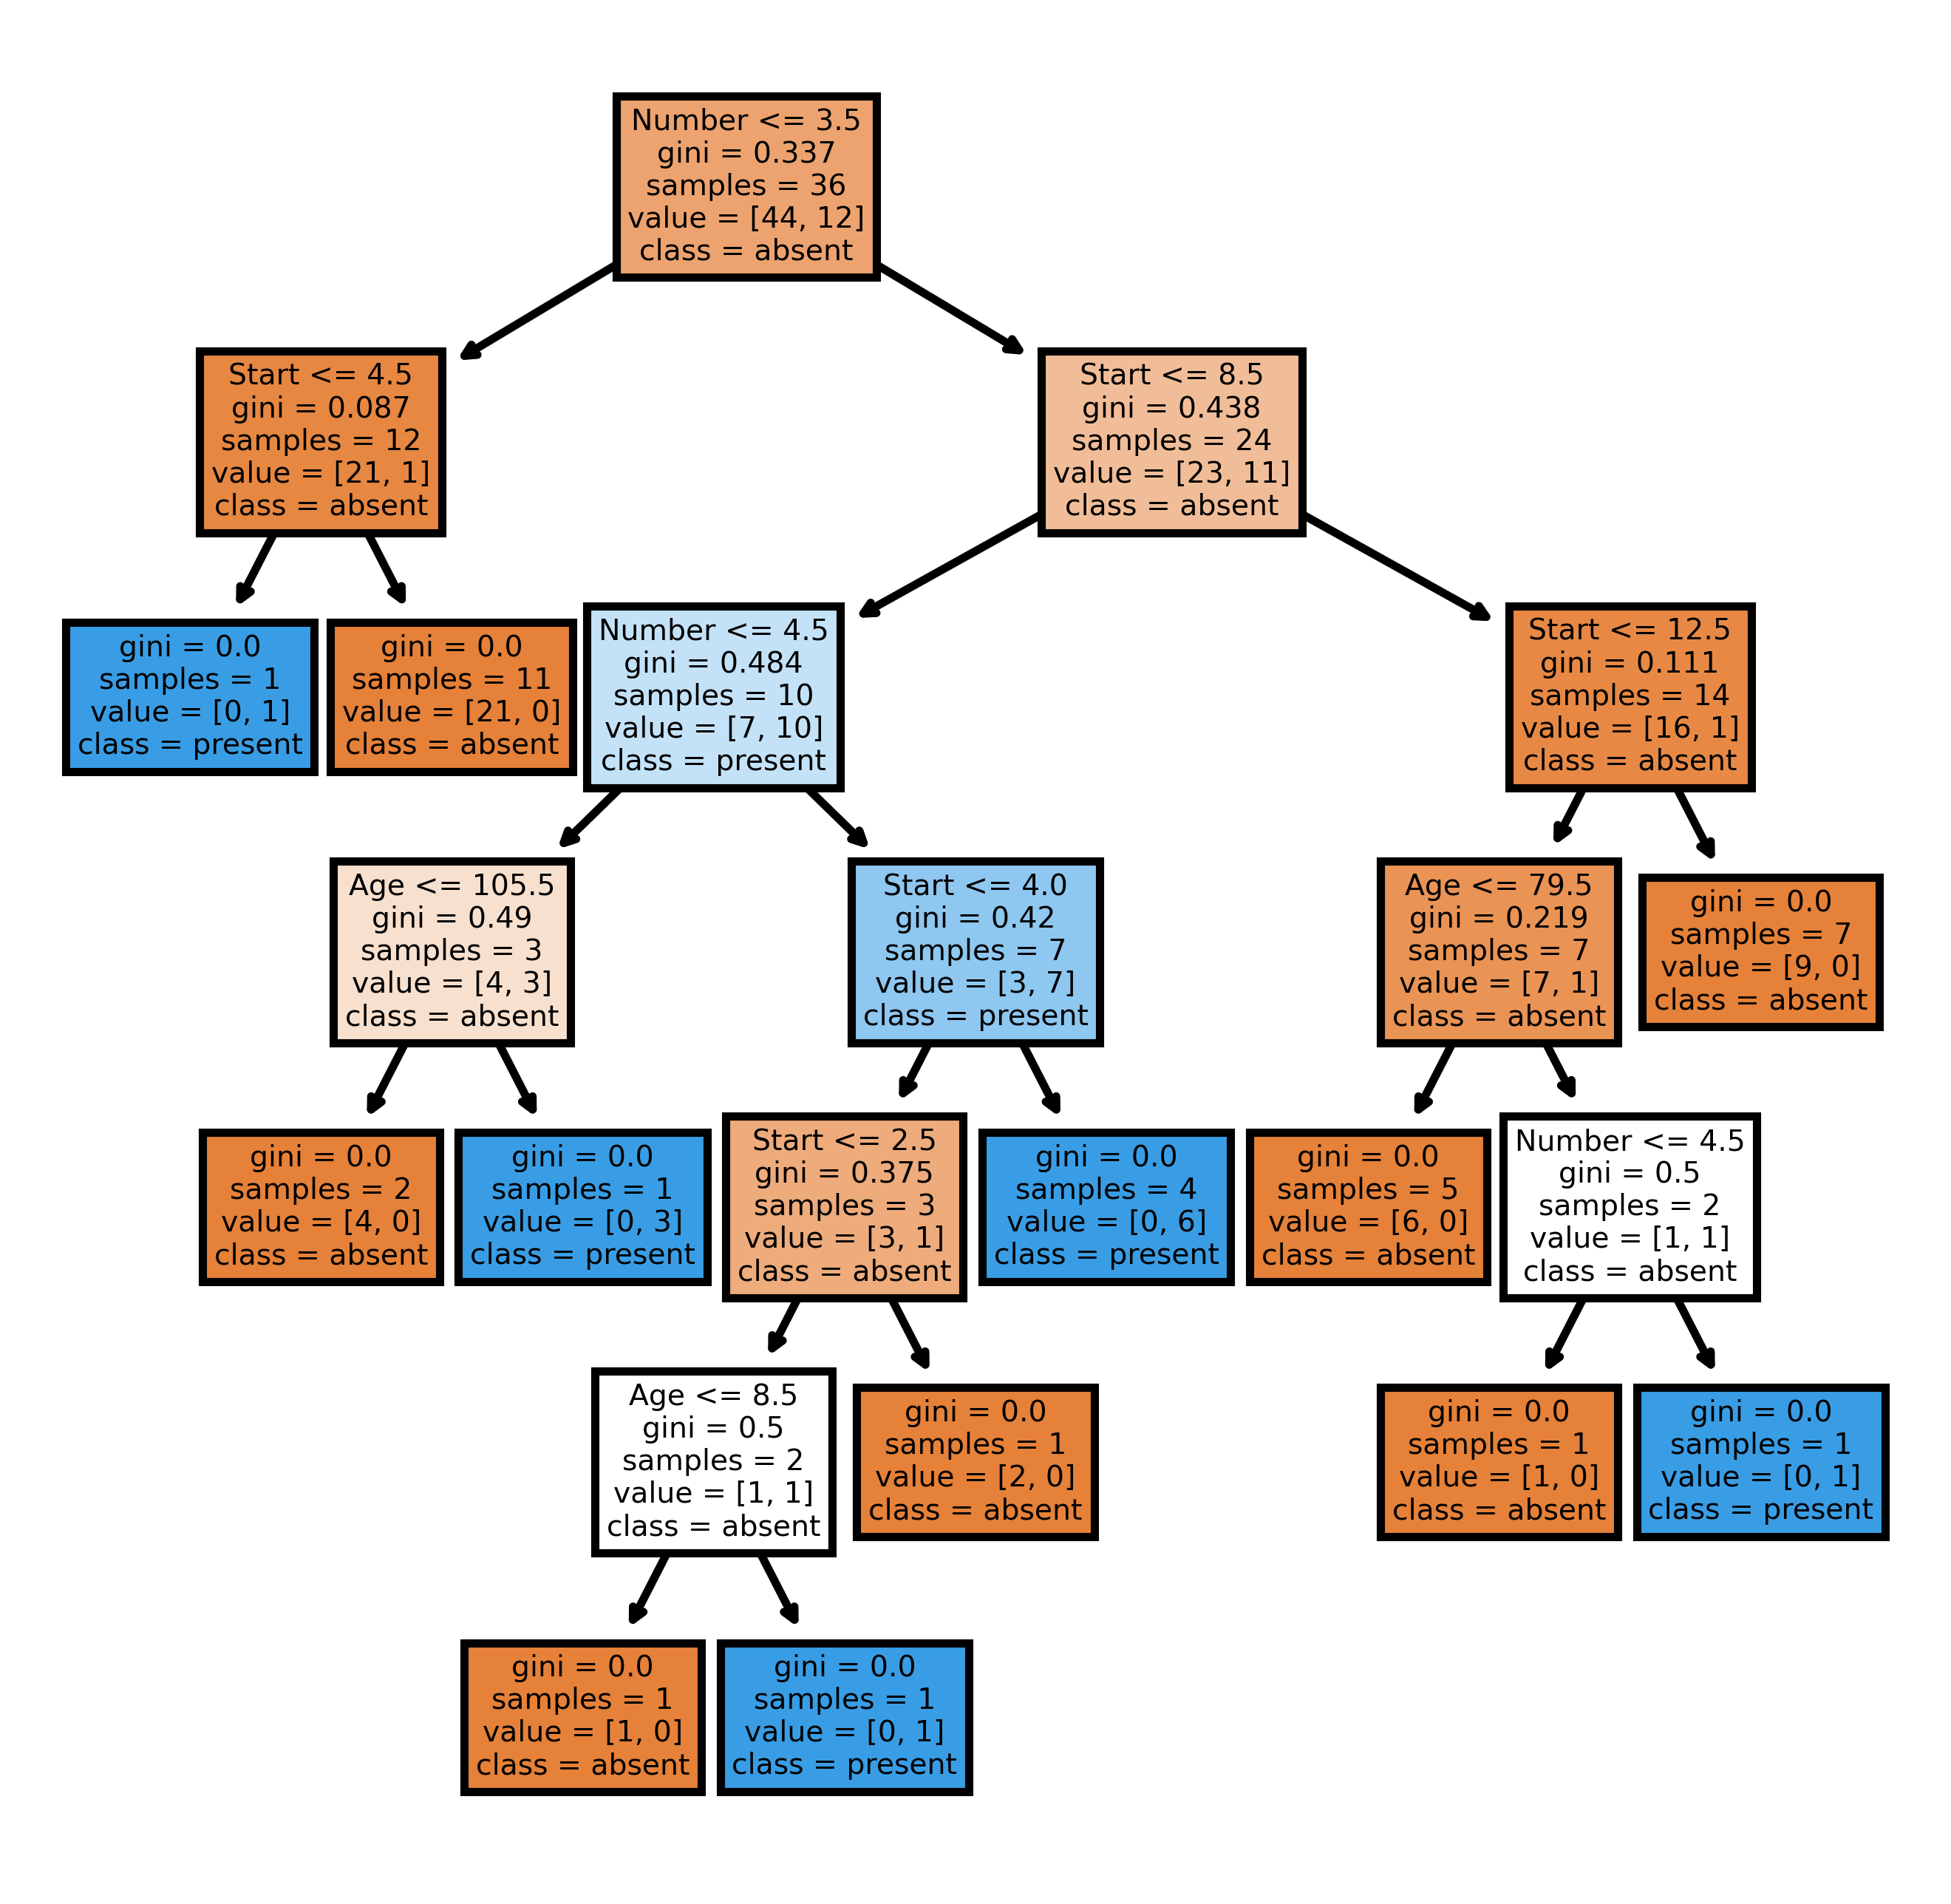

In [33]:
fn=features
cn=targets
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);